In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

In [12]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
model=None
model = tf.keras.models.Sequential([
    Flatten(input_shape=x_train[0].shape),
    BatchNormalization(),
    Dense(1000, activation=tf.nn.relu),
    Dense(500, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

In [15]:
N_ELEM = 25
N_EPOCHS = 100
VALIDATION_SIZE = 100
model.fit(
    x_train[:N_ELEM],
    y_train[:N_ELEM],
    epochs=N_EPOCHS,
    validation_data=(x_test[:VALIDATION_SIZE], y_test[:VALIDATION_SIZE]))

Train on 25 samples, validate on 100 samples
Epoch 1/100
25/25 [==============================] - 0s 14ms/sample - loss: 2.4867 - acc: 0.1200 - val_loss: 15.9437 - val_acc: 0.3000
Epoch 2/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.4994 - acc: 1.0000 - val_loss: 14.9896 - val_acc: 0.3800
Epoch 3/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.0925 - acc: 1.0000 - val_loss: 15.0582 - val_acc: 0.4100
Epoch 4/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 15.5530 - val_acc: 0.4200
Epoch 5/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 16.1505 - val_acc: 0.4200
Epoch 6/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 16.7643 - val_acc: 0.4200
Epoch 7/100
25/25 [==============================] - 0s 2ms/sample - loss: 6.4044e-04 - acc: 1.0000 - val_loss: 17.3490 - val_acc: 0.4300
Epoch 8/100


Epoch 60/100
25/25 [==============================] - 0s 3ms/sample - loss: 8.4876e-07 - acc: 1.0000 - val_loss: 32.8861 - val_acc: 0.4300
Epoch 61/100
25/25 [==============================] - 0s 2ms/sample - loss: 8.4400e-07 - acc: 1.0000 - val_loss: 33.1077 - val_acc: 0.4300
Epoch 62/100
25/25 [==============================] - 0s 2ms/sample - loss: 8.3446e-07 - acc: 1.0000 - val_loss: 33.3295 - val_acc: 0.4300
Epoch 63/100
25/25 [==============================] - 0s 2ms/sample - loss: 8.2492e-07 - acc: 1.0000 - val_loss: 33.5510 - val_acc: 0.4300
Epoch 64/100
25/25 [==============================] - 0s 2ms/sample - loss: 8.1539e-07 - acc: 1.0000 - val_loss: 33.7727 - val_acc: 0.4300
Epoch 65/100
25/25 [==============================] - 0s 2ms/sample - loss: 8.1062e-07 - acc: 1.0000 - val_loss: 33.9943 - val_acc: 0.4300
Epoch 66/100
25/25 [==============================] - 0s 2ms/sample - loss: 8.0585e-07 - acc: 1.0000 - val_loss: 34.2158 - val_acc: 0.4300
Epoch 67/100
25/25 [=======

In [16]:
EXPERIMENT_NUMBER = 11

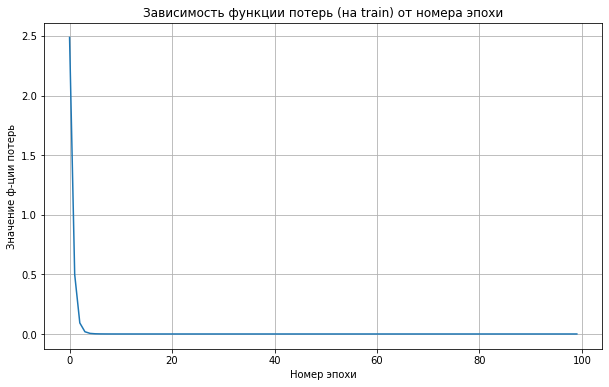

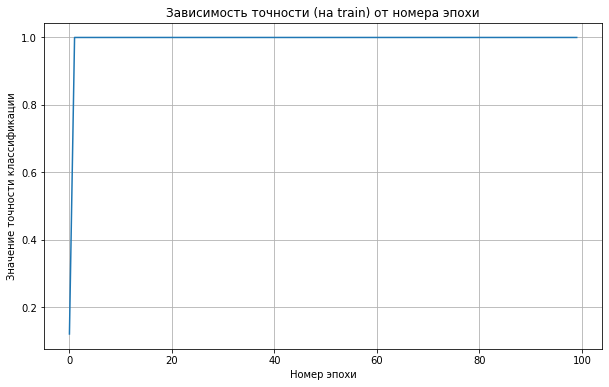

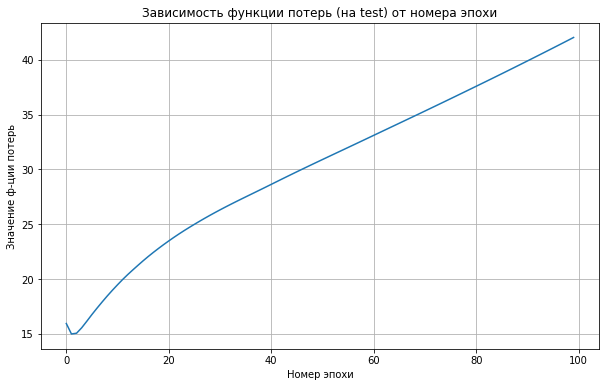

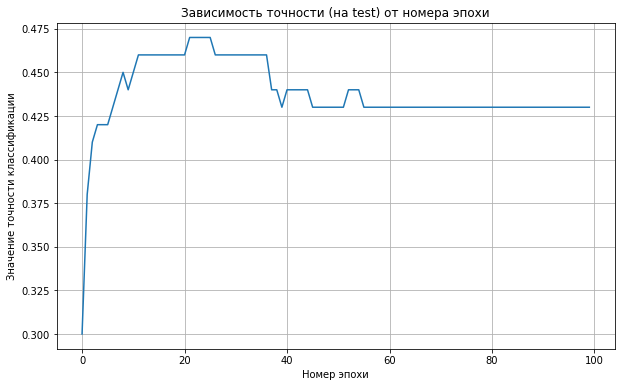

In [17]:
titles = {
    'loss': ["Зависимость функции потерь (на train) от номера эпохи", "Значение ф-ции потерь"],
    'acc': ["Зависимость точности (на train) от номера эпохи", "Значение точности классификации"],
    'val_loss': ["Зависимость функции потерь (на test) от номера эпохи", "Значение ф-ции потерь"],
    "val_acc": ["Зависимость точности (на test) от номера эпохи", "Значение точности классификации"]
}

for p in ('loss', 'acc', 'val_loss', 'val_acc'):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.set(title=titles[p][0], ylabel=titles[p][1], xlabel="Номер эпохи")
    ax.grid()
    ax.plot(model.history.epoch, model.history.history[p])
    plt.savefig(p+'%d.png' % EXPERIMENT_NUMBER)
    
model.save('overtrained_%d.h5' % EXPERIMENT_NUMBER)